# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [7]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [1]:
# Import essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

Load the dataset.

In [ ]:
# Load and unzip the dataset

folder = "/Users/vamsi/Documents/upGrad/Case Study/WasteSegregation"

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [3]:
# Create a function to load the raw images

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        print(label_path)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                try:
                    img = Image.open(img_path)
                    images.append(np.array(img))
                    labels.append(label)
                except:
                    continue
    return images, labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [4]:
# Get the images and their labels

data_dir = folder
images, labels = load_images_from_folder(data_dir)
print(f"Loaded {len(images)} images.")

/content/drive/My Drive/data/.DS_Store
/content/drive/My Drive/data/Paper
/content/drive/My Drive/data/Plastic
/content/drive/My Drive/data/Cardboard
/content/drive/My Drive/data/Other
/content/drive/My Drive/data/Metal
/content/drive/My Drive/data/Food_Waste
/content/drive/My Drive/data/Glass
Loaded 7625 images.


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

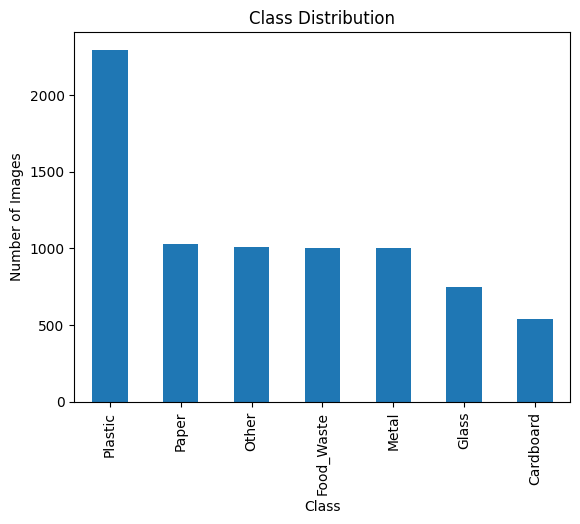

In [5]:
# Visualise Data Distribution

label_counts = pd.Series(labels).value_counts()
label_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

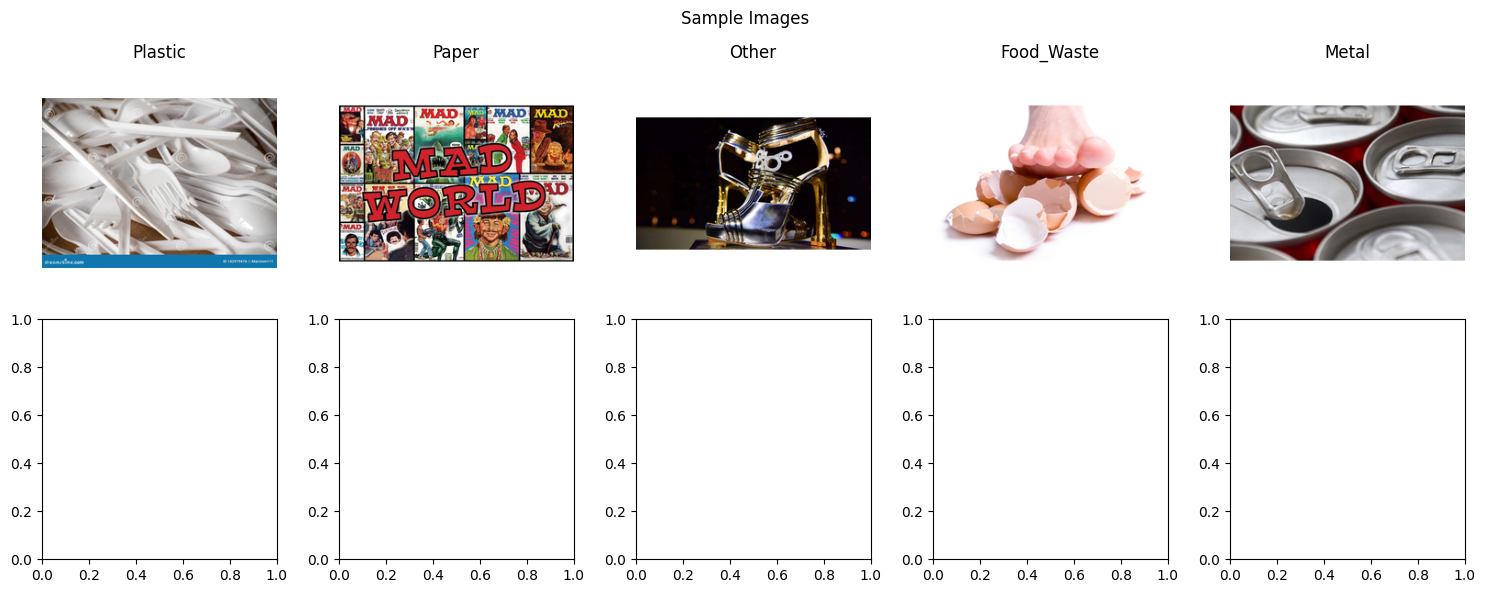

In [9]:
# Visualise Sample Images (across different labels)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))


fig.suptitle("Sample Images")
for i, label in enumerate(label_counts.index[:5]):
    img_idx = labels.index(label)
    axs[0, i].imshow(images[img_idx])
    axs[0, i].set_title(label)
    axs[0, i].axis('off')
plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set

sizes = [img.shape[:2] for img in images]
min_dim = np.min(sizes, axis=0)
max_dim = np.max(sizes, axis=0)
print("Min dimensions:", min_dim)
print("Max dimensions:", max_dim)



Min dimensions: [256 256]
Max dimensions: [256 256]


In [ ]:
# Resize the image dimensions

IMG_SIZE = (128, 128)
resized_images = [cv2.resize(img, IMG_SIZE) for img in images]
resized_images = np.array(resized_images)

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
#Encode the labels suitably
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    resized_images, categorical_labels, test_size=0.2, random_state=42, stratify=categorical_labels
)

# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [13]:
# Build and compile the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,223 (28.20 MB)

 Trainable params: 7,393,223 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [14]:
# Training
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 181s 928ms/step - accuracy: 0.2802 - loss: 2.1312 - val_accuracy: 0.3934 - val_loss: 1.6830
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 176s 918ms/step - accuracy: 0.4040 - loss: 1.6065 - val_accuracy: 0.4466 - val_loss: 1.4696
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 165s 865ms/step - accuracy: 0.5137 - loss: 1.3422 - val_accuracy: 0.4852 - val_loss: 1.4106
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 211s 913ms/step - accuracy: 0.5959 - loss: 1.1129 - val_accuracy: 0.5495 - val_loss: 1.3056
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 200s 902ms/step - accuracy: 0.7080 - loss: 0.8425 - val_accuracy: 0.5711 - val_loss: 1.3581
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 201s 898ms/step - accuracy: 0.7772 - loss: 0.6459 - val_accuracy: 0.5954 - val_loss: 1.3594
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 193s 853ms/step - accuracy: 0.8427 - loss: 0.4727 - val_accuracy: 0.5961 - val_loss: 1.3435
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 210s 898ms/step - accuracy: 0.8690 -

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [15]:
# Evaluate on the test set; display suitable metrics
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 0.6290 - loss: 1.6813
Validation Accuracy: 61.18%


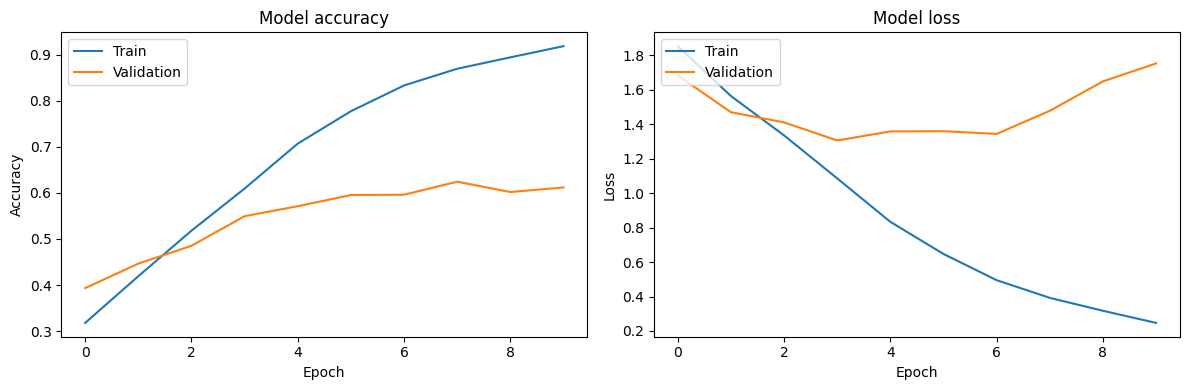

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data

* Report model training results

## Findings about the data

* The data was successfully loaded and labeled, and a class distribution chart was created to check for balance across the different types of waste.

* Sample images from each category were shown, helping confirm the images were loaded correctly and matched the right labels.

* Image sizes varied, so all images were resized to 128x128 pixels to make them uniform for the model.



* Labels were encoded into numbers and then converted into a format the model can understand (one-hot encoding).

* The dataset was split into training and validation sets (80/20 split).

* Image values were normalized (scaled between 0 and 1) for better performance during training.


## Model training results

* A Convolutional Neural Network (CNN) was built with layers designed to extract patterns from images.

* The model was trained for 10 epochs, meaning it looked through the entire dataset 10 times.

* After training, the model achieved a validation accuracy of around 61.18%, showing that it learned to correctly identify most of the waste categories.

* Overall, this project demonstrates how machine learning can effectively be used for image-based waste segregation, which could support better recycling and waste management systems.